# Harmonic Analysis of Tide Gauge Records around West Africa

The tides are a phenomenon that shape our world across a variety of scales. On a very practical level, accurate prediction of the tides is of importance to sea-faring workers, and the exact behavior of the tides can vary strongly between coastal settings (particularly in embayments). In this notebook, we will work with tide gauge data from all around West Africa. We have a few broad objectives: 

**(1)** learn about the **behavior of the tides** at coastal boundaries,

**(2)** learn a data fitting technique called **Harmonic Analysis** and use it to charachterize the behavior of tides in West Africa, and

**(3)** use this characterization to test whether the tide in Northern West Africa behaves like a **Kelvin wave**. 

In [1]:
import xarray as xr
import numpy as np
import scipy.io
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import cmath
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Retrieving data from [University of Hawai'i Sea Level Center ](https://uhslc.soest.hawaii.edu/stations/?stn=231#climatology)

We have already pulled data from three tide gauges around West Africa (see data files in this notebook's directory). These were found by searching the University of Hawai'i Sea Level Center database (you may also use the [Permanent Service for Mean Sea Level](https://psmsl.org/)), selecting 'hourly data', and requesting a netCDF4 file. This will bring you to an OpenDap data request page that allows you to select which variables and metadata you wish to include in your download.

<img src="./UHSL.png" width=700 height=600 />

Try downloading the hourly tide record from another station along the coast. Try using this station's data in the following exercises, on your own. 

In [2]:
ncfile = './data/h231.nc.nc4'      # Ghana
ds = xr.open_dataset(ncfile)

ncfile0 = './data/h223e.nc.nc4'    # Senegal
ds0 = xr.open_dataset(ncfile0)

ncfile1 = './data/h235.nc.nc4'     # Cabo Verde
ds1 = xr.open_dataset(ncfile1)

ncfile2 = './data/h234.nc.nc4'     # Congo
ds2 = xr.open_dataset(ncfile2)

ncfile3 = './data/h220.nc.nc4'     # Namibia
ds3 = xr.open_dataset(ncfile3)

ncfile4 = './data/h225a.nc.nc'     # Sao Tome and Principe
ds4 = xr.open_dataset(ncfile4)

## Tide gauge locations

Before doing any analysis, let's get oriented. Where are these tide gauges? 

(We know where they are already, since we pulled the data ourselves. If we were working with many tide gauges, we would want our netCDF files to contain location metadata that we could call in the following plot's legend.)

/Users/anderson/opt/anaconda3/envs/XROMS/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/anderson/opt/anaconda3/envs/XROMS/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


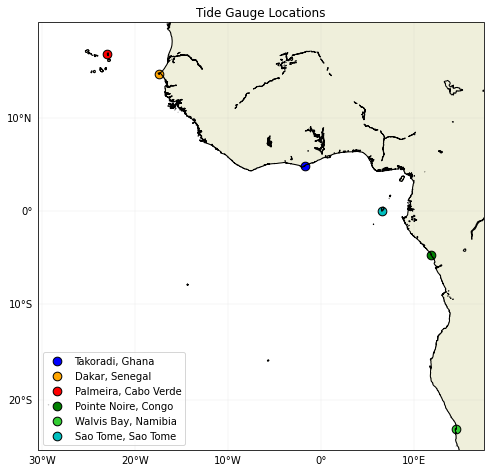

In [3]:
# define transform and projection

mytransform = ccrs.PlateCarree()
myprojection = ccrs.Mercator();
ms = 75 # toggle marker size

# Create figure with just the extent of the Gulf of Guinea

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection=myprojection));
ax.set_extent([-30.5, 17.5, -25, 20],crs=ccrs.PlateCarree());
plt.title('Tide Gauge Locations')


# add land, coastline, etc. for an easy-to-read plot

ax.add_feature(cfeature.LAND);
coast = cfeature.GSHHSFeature(levels = [1,2], scale='f') # fancy way to get high-resolution coastline + rivers
ax.add_feature(coast)
glb = ax.gridlines(draw_labels=True, alpha=0.5, linewidth=.2);
glb.xlabels_top = glb.ylabels_right = False;

# add our tide gauge locations

ax.scatter(ds.lon, ds.lat, transform=mytransform, c='b', edgecolors= 'black', s=ms, label='Takoradi, Ghana');
ax.scatter(ds0.lon, ds0.lat, transform=mytransform, c='orange', edgecolors= 'black', s=ms, label='Dakar, Senegal');
ax.scatter(ds1.lon, ds1.lat, transform=mytransform, c='r', edgecolors= 'black', s=ms, label='Palmeira, Cabo Verde');
ax.scatter(ds2.lon, ds2.lat, transform=mytransform, c='g', edgecolors= 'black', s=ms, label='Pointe Noire, Congo');
ax.scatter(ds3.lon, ds3.lat, transform=mytransform, c='limegreen', edgecolors= 'black', s=ms, label='Walvis Bay, Namibia');
ax.scatter(ds4.lon, ds4.lat, transform=mytransform, c='c', edgecolors= 'black', s=ms, label='Sao Tome, Sao Tome');

plt.legend(loc='lower left');

## Explore gauge records

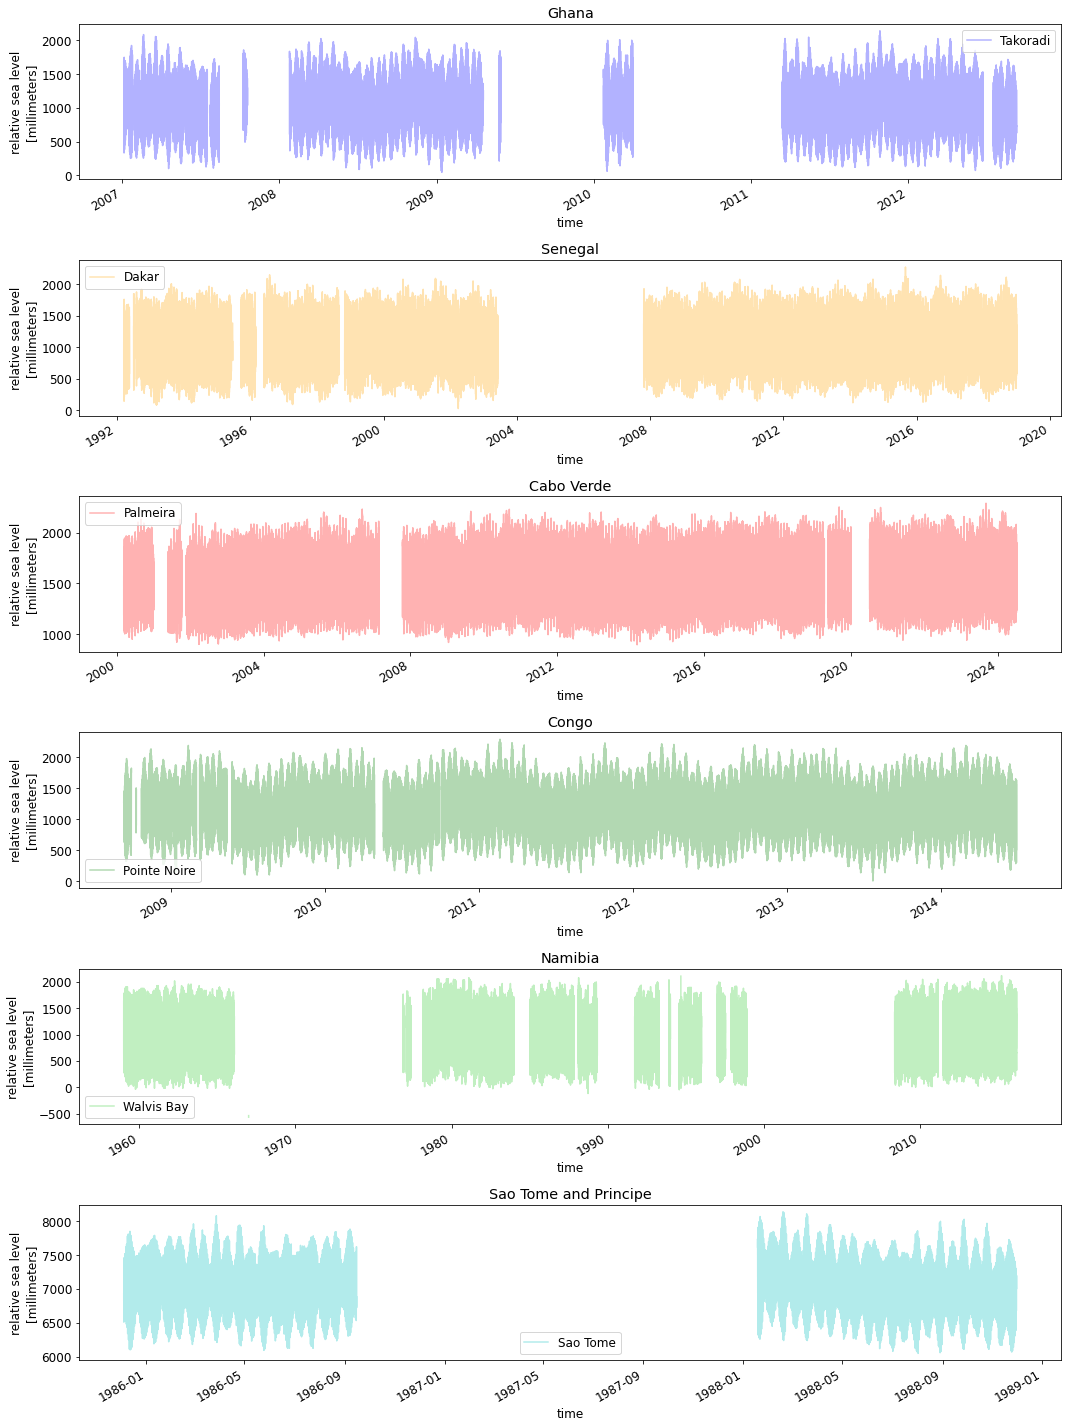

In [4]:
# take a look at the tide gauge data

lims = None                             # for no limits (show entire timeseries)
# lims = (ds.time[42000], ds.time[44500]) # choose x-axis limits for all records to look around

fig = plt.figure(figsize=(15,20));
plt.rcParams.update({'font.size': 12}); # toggle font size
a = 0.3                                 # toggle color intensity

# subplots _______________________________________________________

plt.subplot(6, 1, 1);
ax = ds.sea_level.plot(label='Takoradi', c='b', alpha=a);
plt.title('Ghana')
plt.xlim(lims)
plt.legend();

plt.subplot(6, 1, 2);
ax = ds0.sea_level.plot(label='Dakar', c='orange', alpha=a);
plt.title('Senegal')
plt.xlim(lims)
plt.legend();

plt.subplot(6, 1, 3);
ax = ds1.sea_level.plot(label='Palmeira', c='r', alpha=a);
plt.title('Cabo Verde')
plt.xlim(lims)
plt.legend();

plt.subplot(6, 1, 4);
ax = ds2.sea_level.plot(label='Pointe Noire', c='g', alpha=a);
plt.title('Congo')
plt.xlim(lims)
plt.legend();

plt.subplot(6, 1, 5);
ax = ds3.sea_level.plot(label='Walvis Bay', c='limegreen', alpha=a);
plt.title('Namibia')
plt.xlim(lims)
plt.legend();

plt.subplot(6, 1, 6);
ax = ds4.sea_level.plot(label='Sao Tome', c='c', alpha=a);
plt.title('Sao Tome and Principe')
plt.xlim(lims)
plt.legend();

plt.tight_layout()

### Qualitatively, what do you notice about each record?

Take a moment to note some features, similarities, and differences apparent between these records, at a glance.

### Change the x-limits on the plots above to zoom in. 

Can you visually identify spring, neap, perigee, and apogee cycles?

## Qualitatively compare Takoradi and Pointe Noir

Takoradi and Pointe Noir are both coastal stations with similar temporal coverage. Let's take a closer look at similarities/differences between the two stations, by plotting them on top of each other and zooming in on a time where both have continuous data. 

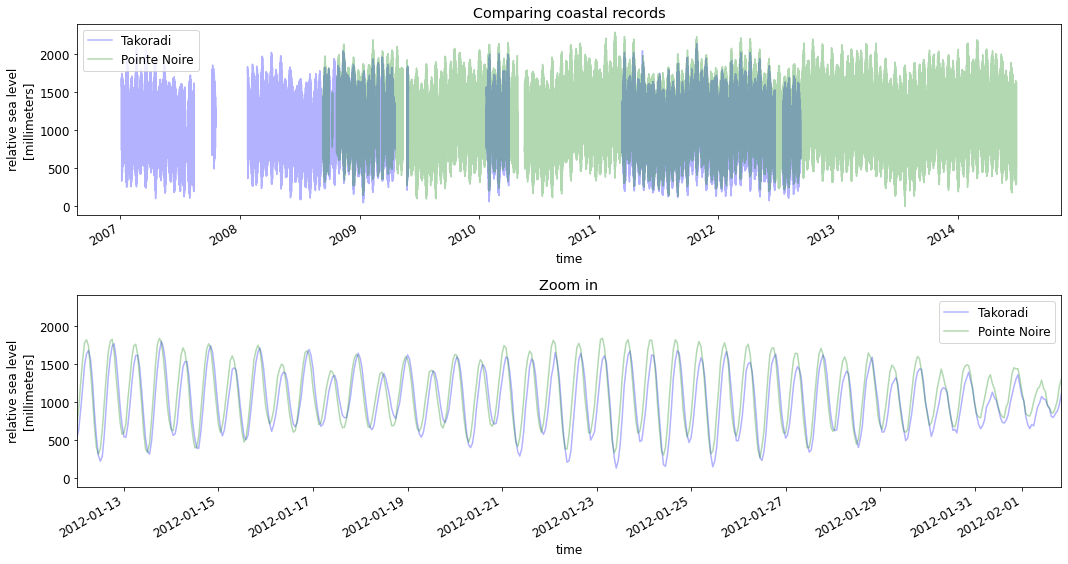

In [5]:
# plot Takoradi & Pointe Noire together

lims = (ds.time[44000], ds.time[44500])

fig = plt.figure(figsize=(15,8));
plt.rcParams.update({'font.size': 12}); # toggle font size
a = 0.3                                 # toggle color intensity

plt.subplot(2, 1, 1);
ax = ds.sea_level.plot(label='Takoradi', c='b', alpha=a);
ax = ds2.sea_level.plot(label='Pointe Noire', c='g', alpha=a);
plt.title('Comparing coastal records')
plt.legend();

plt.subplot(2, 1, 2);
ax = ds.sea_level.plot(label='Takoradi', c='b', alpha=a);
ax = ds2.sea_level.plot(label='Pointe Noire', c='g', alpha=a);
plt.title('Zoom in')
plt.xlim(lims)
plt.legend();

plt.tight_layout();

## Qualitatively compare Takoradi, Dakar, and Palmeira

Takoradi and Dakar are both coastal stations in the Northern Hemisphere. Palmeira is offshore, just North of Dakar. Unfortunately, they each have fairly different temporal coverage... Let's take a closer look at similarities/differences between the three stations, by plotting them on top of each other and zooming in on a time where they all have continuous data. 

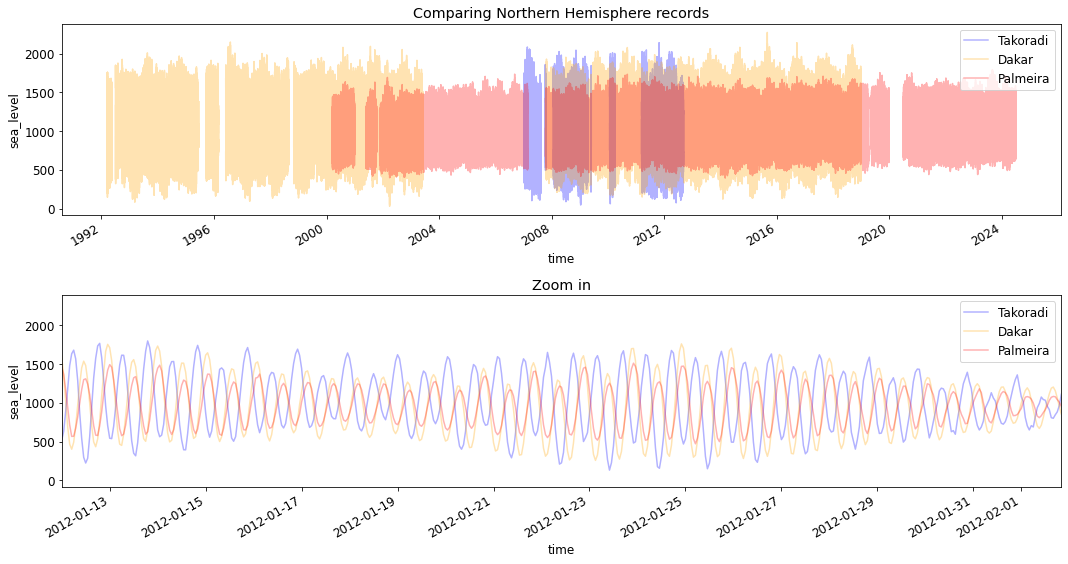

In [6]:
# plot Takoradi & Dakar together

lims = (ds.time[44000], ds.time[44500])

fig = plt.figure(figsize=(15,8));
plt.rcParams.update({'font.size': 12}); # toggle font size
a = 0.3                                 # toggle color intensity

plt.subplot(2, 1, 1);
ax = ds.sea_level.plot(label='Takoradi', c='b', alpha=a);
ax = ds0.sea_level.plot(label='Dakar', c='orange', alpha=a);
ax = (ds1.sea_level-500).plot(label='Palmeira', c='r', alpha=a);
plt.title('Comparing Northern Hemisphere records')
plt.legend();

plt.subplot(2, 1, 2);
ax = ds.sea_level.plot(label='Takoradi', c='b', alpha=a);
ax = ds0.sea_level.plot(label='Dakar', c='orange', alpha=a);
ax = (ds1.sea_level-500).plot(label='Palmeira', c='r', alpha=a);
plt.title('Zoom in')
plt.xlim(lims)
plt.legend();

plt.tight_layout();

$$\require{cancel}$$  
### What might explain the differences between Gauge records?

In the following exercises, we want to see if these differences in records (tidal amplitude, signal arrival time, etc.) are consistent with the propagation of a coastal Kelvin wave, for stations in the Northern Hemisphere. Recall from lecture that Kelvin waves propagate along boundaries (coastlines, the equator), and that their wave amplitude exponentially decays with distance from the boundary.

<img src="./Kelvin.png" width=700 height=600 /> 

Pure Kelvin waves have no cross-shore (into and out of coastline) velocity. If we have a Kelvin wave propagating along a zonal coastline like in the figure above, we treat the meriodional fluid velocity as zero in the momentum balance:

$$\frac{\partial u}{\partial t} = \cancel{fv} - g\frac{\partial \eta}{\partial x}$$
$$\cancel{\frac{\partial v}{\partial t}} = -fu - g\frac{\partial \eta}{\partial y}.$$

This example illustrates the fundamental momentum balance of Kelvin waves: geostrophic (pressure gradient balanced by rotation) in the cross-shore direction, and along shore fluid accelerations (oscillations) determined by pressure gradients associated with wave crests and troughs. The attenuation of wave amplitude with cross-shore distance is given by

$$\eta = \eta_0e^{-\frac{y}{R_d}}\sin(kx - \omega t),$$

where $y$ is being used as the cross-shore direction and $R_d = \frac{\sqrt{gH}}{f}$. Finally, recall that Kelvin waves propagate (phase speed rather than fluid velocity!) at the shallow water wave speed, 

$$c_p = \sqrt{gH}. $$

#### Next steps

To investigate how well our tide gauge records match up with the pure Kelvin wave theory, we want to figure out:

- Can the difference in tidal ranges between coastal stations and Palmeira be explained by offshore Kelvin wave decay? 
- Can the difference in wave arrival time between Takoradi and Dakar be explained by a Kelvin wave phase speed?
- **BONUS:** Does the propagation of the tide appear to be dispersive? Is your answer different between the NH and SH stations?

Our tidal records have some large gaps in them. First, we will fill these gaps and identify the dominant constituents of West Africa's tides, using harmonic analysis. 

## Filling data gaps using harmonic analysis 

Harmonic analysis is a useful tool for reconstructing or modeling long timeseries of data whose contributing frequencies we already know (for instance, the frequencies associated with the many tidal constituents). For a tide gauge record with no gaps, we might use this technique to isolate the sea level signal that cannot be explained by the tides (the "de-tided" sea level record). For gauges with large gaps, we can use the harmonic fit of the existing parts of the record to make estimates about what is missing.

For a tide gauge record (timseries) of length $N$, we might choose to represent the record as a sum of three parts: mean sea level over the entire record, a (harmonic) model consisting of a bunch of waves that undulate at tidal frequencies, and some residual (whatever is left over). Mathematically, this looks like: 

$$ \large \underbrace{x_{(t_n)}}_{\text{data}} = \underbrace{\overline{x}}_{\text{mean}} + \underbrace{\sum\limits^M_{m=1}\left[C_m \cos(2\pi f_mt_n - \phi_m)\right]}_{\text{model, using $M$ tidal constituents}} + \underbrace{x_{r(t_n)}}_{\text{residuals}} $$

$$\longleftrightarrow$$

$$ \underbrace{x_{(t_n)}}_{\text{data}} = \underbrace{\overline{x}}_{\text{mean}} + \underbrace{\sum\limits^M_{m=1}\left[A_m \cos(\omega_mt_n) + B_m \sin(\omega_mt_n)\right]}_{\text{model, using $M$ tidal constituents}} + \underbrace{x_{r(t_n)}}_{\text{residuals}}, $$

where $C_m = \sqrt{A_m^2 + B_m^2}$  and $\phi_m = \tan^{-1}\left(\frac{B_m}{A_m}\right)$.

We then need to find the set of coefficients $A_m$ and $B_m$ that do the best job of fitting the data, which should be dominated by the signal of the tides. We'll use a "least squares" method to do this, choosing these coefficients such that we minimize the variance of the residuals (sum of all residuals squared) above. We can use the above to write the variance $\epsilon^2$ as

$$\begin{aligned} \epsilon^2  &= \sum\limits^N_{n=1}x_{r(t_n)}^2 \\ &= \sum\limits^N_{n=1}\left[ x_{(t_n)} - \left(\overline{x} + \sum\limits^M_{m=1}\left[A_m \cos(\omega_mt_n) + B_m \sin(\omega_mt_n)\right] \right)\right]^2 .\end{aligned}$$ 

Then, we want to minimize $\epsilon^2$. If we think of the variance as a function of all possible choices for coefficients $A_m$ and $B_m$, then a natural way to find its minimum is to take its partial derivatives with respect to $A_m$ and $B_m$ and set them to zero. We may also do this for the mean, for completeness: 

$$\begin{aligned} \frac{\partial\epsilon^2}{\partial\overline{x}} &= -2\sum\limits^N_{n=1}\left[x_{(t_n)} - \left(\overline{x} + \sum\limits^M_{m=1}\left[A_m \cos(\omega_mt_n) + B_m \sin(\omega_mt_n)\right]\right)\right] = 0 \\ \frac{\partial\epsilon^2}{\partial A_m} &= -2\cos(\omega_m t_n)\sum\limits^N_{n=1}\left[x_{(t_n)} - \left(\overline{x} + \sum\limits^M_{m=1}\left[A_m \cos(\omega_mt_n) + B_m \sin(\omega_mt_n)\right]\right)\right]=0 \\ \frac{\partial\epsilon^2}{\partial B_m} &= -2\sin(\omega_m t_n)\sum\limits^N_{n=1}\left[x_{(t_n)} - \left(\overline{x} + \sum\limits^M_{m=1}\left[A_m \cos(\omega_mt_n) + B_m \sin(\omega_mt_n)\right]\right)\right] = 0. \end{aligned} $$

To see how we can go about solving this system of equations, let's just look at $\frac{\partial\epsilon^2}{\partial A_m} = 0$, and let's make the simplifying assumption that our model is only using one frequency, $\omega_1$. Then, we have

$$ \frac{\partial\epsilon^2}{\partial A_1} = -2\cos(\omega_1 t_n)\sum\limits^N_{n=1}\left[x_{(t_n)} - \left(\overline{x} + A_1\cos(\omega_1t_n) + B_1 \sin(\omega_1t_n)\right)\right]= 0$$ 

$$\longleftrightarrow$$

$$ \begin{aligned} 0 &= \sum\limits^N_{n=1}\left[ x_{(t_n)}\cos(\omega_1 t_n) - \overline{x}\cos(\omega_1 t_n) - A_1\cos(\omega_1t_n)^2 - B_1\sin(\omega_1t_n)\cos(\omega_1t_n)\right]\\ \sum\limits^N_{n=1} x_{(t_n)}\cos(\omega_1 t_n) &= \overline{x}\sum\limits^N_{n=1}\cos(\omega_1 t_n) + A_1\sum\limits^N_{n=1}\cos(\omega_1t_n)^2 + B_1\sum\limits^N_{n=1}\sin(\omega_1t_n)\cos(\omega_1t_n) \end{aligned}. $$ 

We can do this same rearrangement for all three equations and rewrite the problem in matrix form

$$\underbrace{\left[\begin{matrix}\sum\limits^N_{n=1} x_{(t_n)}\\\sum\limits^N_{n=1} x_{(t_n)}\cos(\omega_1 t_n)\\\sum\limits^N_{n=1} x_{(t_n)}\sin(\omega_1 t_n) \end{matrix}\right]}_{\boldsymbol{y}}=\underbrace{\left[\begin{matrix} N & \sum\limits^N_{n=1} x_{(t_n)}\cos(\omega_1 t_n) & \sum\limits^N_{n=1} x_{(t_n)}\sin(\omega_1 t_n) \\\sum\limits^N_{n=1} x_{(t_n)}\cos(\omega_1 t_n) & \sum\limits^N_{n=1} x_{(t_n)}\cos(\omega_1 t_n)^2 & \sum\limits^N_{n=1} x_{(t_n)}\sin(\omega_1 t_n)\cos(\omega_1 t_n) \\\sum\limits^N_{n=1} x_{(t_n)}\sin(\omega_1 t_n)& \sum\limits^N_{n=1} x_{(t_n)}\sin(\omega_1 t_n)\cos(\omega_1 t_n) & \sum\limits^N_{n=1} x_{(t_n)}\sin(\omega_1 t_n)^2 \end{matrix}\right]}_{\boldsymbol{D}}
\underbrace{\left[\begin{matrix}\overline{x}\\A_1\\B_1 \end{matrix}\right]}_{\boldsymbol{z}}.$$

Whew! Now, using the names for each matrix written underneath the curly brackets, we have only to solve the problem 

$$\boldsymbol{z} = \boldsymbol{D}^{-1}\boldsymbol{y}$$

for each tidal constituent. Let's code up this matrix problem, using a loop to apply it to each tidal constituent. (For linear algebra enthusiasts, a nice challenge to try on your own is to solve this problem for all constituents simultaneously, without using a loop. It's more computationally efficient. Chapter 5.9 of Thompson & Emery might be helpful here.)

In [7]:
# define array of tidal constituents

# all tidal constituents, in some helpful categories

shortest = np.array([12.42/2, 8.1771, 6, 12.42/3, 3.1051]);
semi_diurnal = np.array([12.4206, 12.6563, 12.00, 12.62, 12.87]);
diurnal = np.array([26.8680, 25.8193, 24.0659, 23.9345]);
longest = np.array([8766.1526, 4383.0763, 661.3111, 354.3670, 327.599]);

# choose which categories to represent in your analysis

per= np.concatenate((shortest, semi_diurnal, diurnal, longest))
om = 2*np.pi/per

In [8]:
# all tidal constituents for Pointe Noire

SL = ds2.sea_level[0].data                                    # Designate data to be used in harmonic analysis. The [0].data parts
                                                              # are necessary to remove an extra dimension from our Xarray.DataArray.
totalfit = 0                                                  # create a variable to add each constituent's fit to, in the loop
amplitudes = []                                               # create an empty list of amplitudes for the loop to populate
phases = []                                                   # create an empty list of phase shifts for the loop to populate

for i in np.arange(len(om)):                                  # loop through tidal constituents to fit
    d = np.c_[np.ones(len(SL)),                               # matrix where columns are 1, cos(om*t), sin(om*t)
              np.cos(om[i]*np.arange(len(SL))), 
              np.sin(om[i]*np.arange(len(SL)))]
    D = np.dot(d.T,d)                                         # use matrix d to create a square (symmetric) matrix D                   
    y = np.array([np.nansum(np.multiply(SL, d.T), axis=1)])   # create matrix y in notes above
    z = np.dot(np.linalg.inv(D), y.T)                         # extract amplitudes Am, Bm in notes above
    C = np.sqrt(z[1]**2 + z[2]**2)                            # compute amplitude Cm in notes above
    phi = np.arctan2(z[2], z[1])                              # compute phase shift phi_m as in notes above
    fit = C*np.cos(om[i]*np.arange(len(SL)) - phi)            # the modeled tide, for constituent "i" in loop
    totalfit = totalfit + fit                                 # add modeled tide "i" to our model of the full tide
    amplitudes = np.append(amplitudes, C)                     # add the amplitude associated with constituent "i" to an array
    phases = np.append(phases, phi)                           # add the phase associated with constituent "i" to an array
    
totalfit = totalfit + z[0]                                    # finally, add mean sea level to the harmonic fit! 

Let's take a look at some of these arrays and variables we've created. Are they what we expect them to be? 

In [9]:
# is the first item in matrix z the mean sea level? 

print("z[0] = ", z[0])
print("mean SL = ", np.nanmean(SL))
print()

# is the first item in matrix D equal to N? 

print("D[0,0] = ", D[0,0])
print("N = ", len(SL))
print()

# what else can you check/explore here?



z[0] =  [1111.75087596]
mean SL =  1157.4762

D[0,0] =  50846.0
N =  50846



Now, let's plot our harmonic model and see how well it matches the original data. On your own, try plotting the residuals. Do they look large? 

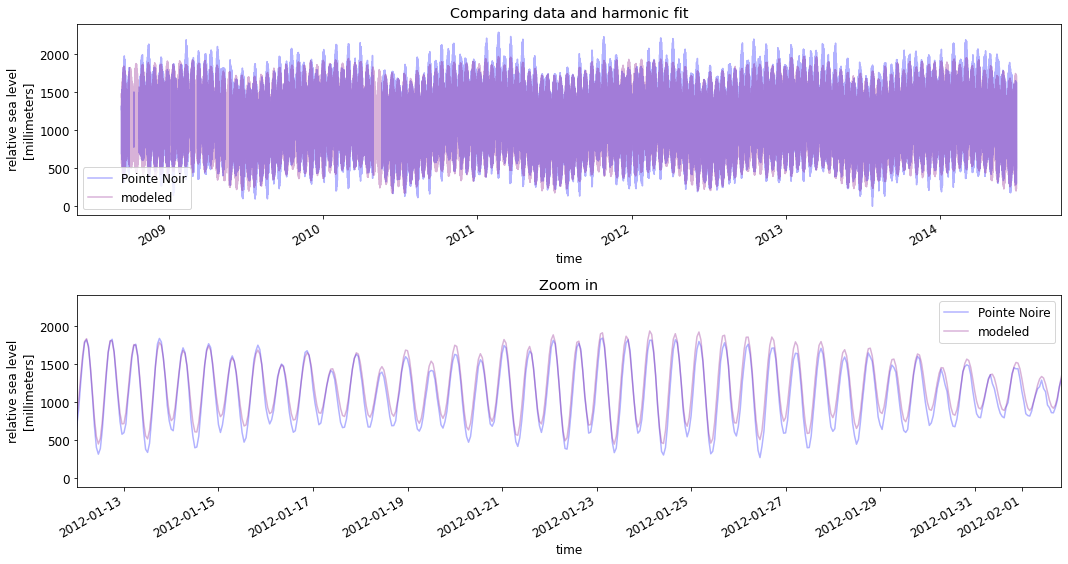

In [10]:
# plot to see how well matches the real data

lims = (ds.time[44000], ds.time[44500]) # choose limits just for the zoom-in plot

fig = plt.figure(figsize=(15,8));
plt.rcParams.update({'font.size': 12}); # toggle font size
a = 0.3                                 # toggle color intensity

plt.subplot(2, 1, 1);
ax = ds2.sea_level.plot(label='Pointe Noir', c='b', alpha=a);

ax = plt.plot(ds2.time, totalfit, label='modeled', c='purple', alpha=a);
plt.title('Comparing data and harmonic fit')
plt.legend();

plt.subplot(2, 1, 2);
ax = ds2.sea_level.plot(label='Pointe Noire', c='b', alpha=a);

ax = plt.plot(ds2.time, totalfit, label='modeled', c='purple', alpha=a);
plt.title('Zoom in')
plt.xlim(lims)
plt.legend();

plt.tight_layout();

Now, let's take a look at the coeffcients (amplitudes). Which tidal constituents are prominent in this dataset? 

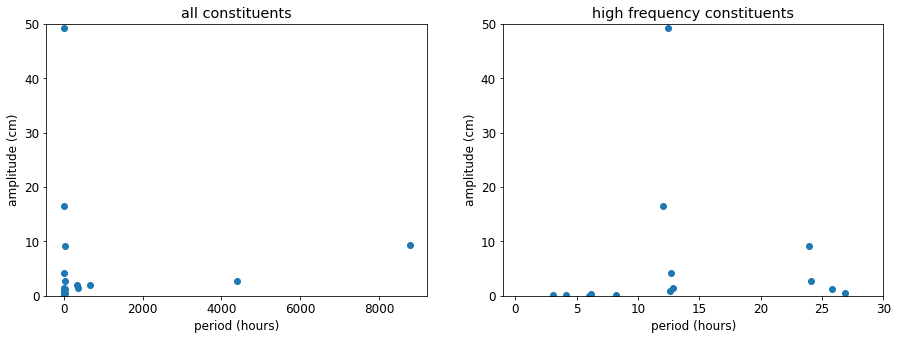

In [11]:
fig = plt.figure(figsize=(15,5));

plt.subplot(1, 2, 1);
plt.title('all constituents')
plt.xlabel('period (hours)');
plt.ylabel('amplitude (cm)');
plt.scatter(per, amplitudes/10);
plt.ylim(0, 50);

plt.subplot(1, 2, 2);
plt.title('high frequency constituents')
plt.xlabel('period (hours)');
plt.ylabel('amplitude (cm)');
plt.scatter(per, amplitudes/10);
plt.xlim(-1, 30);
plt.ylim(0, 50);

#### Challenge: plot constituents

Using a for loop, can you plot all of the tidal constituents (pure frequency waves) from our harmonic fit? Hint: recycle some of the code from the harmonic analysis!

In [12]:
# write a loop that plots constituents


#### Finally, let's save our harmonic fit

In [13]:
# add harmonic fit to original Xarray DataSet

da = xr.DataArray(totalfit, dims="time")

ds2['fit'] = da # Pointe Noire

## Finding the lag using cross-correlation

Now that we have our harmonic fits (filled gaps, isolated influence of the tides, and gained information about constituents), we want to examine the differences in arrival times between stations. To find this difference, or "lag", we can take the cross-correlation of two stations at a time using the nifty Scipy.signal function ```correlate```. Cross-correlation measures the similarity between some vector x and shifted (lagged) copies of another vector y as a function of the lag. See this at work on a randomly generated dataset below: 

In [14]:
# from scipy documentation's tutorial

from scipy import signal

rng = np.random.default_rng()                        # grab a random number generator
x = rng.standard_normal(1000)                        # use the generator to create an array of 1000 numbers from a normal distribution
y = np.concatenate([rng.standard_normal(100), x])    # create another array that has 100 random numbers before x

correlation = signal.correlate(x, y, mode="full")           # cross-correlate arrays x and y
lags = signal.correlation_lags(x.size, y.size, mode="full") # create an array of lags
lag = lags[np.argmax(correlation)]                          # find which lag corresponds to the largest correlation value

Lag of maximum correlation is -100


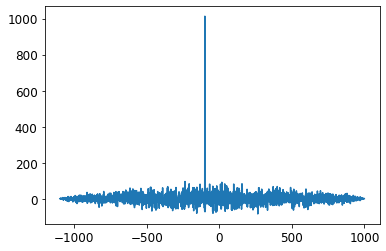

In [15]:
# show lag and correlations 

print("Lag of maximum correlation is", lag)
plt.plot(lags, correlation);

Now try this for our tide gauges. We can use the raw data, the harmonic fits, or even individual tidal constituents from our harmonic analysis. What does the optimal lag end up being, and can you use this to compute a phase speed? Why does our lag vs. correlation plot look so different from that of the randomly generated data? 

Lag of maximum correlation is -5 hours


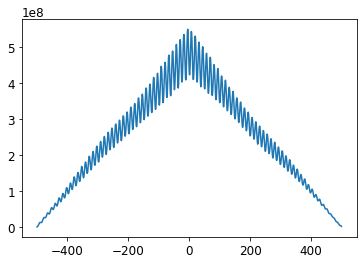

In [16]:
# do this to filled-in coastal tide records

lim1 = ds.time[44000]   # choose same time indicies for both records, for simplicity
lim2 = ds.time[44500]
x = ds.sea_level.sel(time = slice(lim1, lim2))[0] # Takoradi
y = ds0.sea_level.sel(time=slice(lim1, lim2))[0]  # Dakar

correlation = signal.correlate(x, y, mode="full")           
lags = signal.correlation_lags(x.size, y.size, mode="full") 
lag = lags[np.argmax(correlation)]

# show lag and correlations 

print("Lag of maximum correlation is", lag, "hours")
plt.plot(lags, correlation);

### Estimate phase speed and compare to $c_p = \sqrt{gH}$

In [17]:
# estimate distance along coastline wave has to travel 

dist =  2889*1000     # Takoradi to Dakar

# compare phase speeds

cp = np.sqrt(9.8*3000)        # shallow water wave phase speed
my_cp = dist/(abs(lag)*3600)  # our estimate of phase speed

print("shallow water cp = ", cp);
print("our estimate of cp = ", my_cp);

shallow water cp =  171.46428199482247
our estimate of cp =  160.5


## Comparing wave amplitude with theory

We can try to get a rough answer to the first question just by examining the tidal range of the Dakar and Palmeira datasets. Recall our Kelvin wave amplitude given by $\eta = \eta_0e^{-\frac{y}{R_d}}\sin(kx - \omega t),$ where $y$ is being used as the cross-shore direction and $R_d = \frac{\sqrt{gH}}{f}$.

In [18]:
# compare tidal ranges to theoretical Kelvin wave amplitude

Dak = (np.nanmax(ds0.sea_level[0].data) - np.nanmean(ds0.sea_level[0].data))/1000 # tidal range in Dakar, in m 
Pal = (np.nanmax(ds1.sea_level[0].data) - np.nanmean(ds1.sea_level[0].data))/1000 # tidal range in Palmeira, in m 
Pal_x = 653.67*1000                                                               # Palmeira's offshore distance, in m 

Rd = np.sqrt(9.8*3000)/(0.369*10**(-4))  # barotropic deformation radius, rough estimate

eta = (Dak/2)*np.e**(-Pal_x/Rd)          # max value of eta (set sine part equal to 1)

print("Palmeira's tidal amplitude = ", Pal/2)
print("Kelvin wave model prediciton = ", eta)

Palmeira's tidal amplitude =  0.3888485717773438
Kelvin wave model prediciton =  0.5292796644962412


## Extra: investigate whether phase speed varies between constituents

## What else could you do with these tide gauge data? 

Or with the harmonic fits? What kinds of questions could you answer? Split into groups of three and discuss. 